<a href="https://colab.research.google.com/github/muhammadghazyy/UAS_Datmin/blob/main/Notebook_Banjir_Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reqs

In [1]:
!pip3 install tweepy --upgrade

     |████████████████████████████████| 65 kB 1.9 MB/s 
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
!pip3 install sastrawi

     |████████████████████████████████| 209 kB 5.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import csv
import re

from tqdm import tqdm
from textblob import TextBlob
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [4]:
tweepy.__version__

'4.4.0'

# Grabbing Tweets

In [ ]:
api_key = "6ta6EJhcsM9lKPBtOVw0VUdq6"
api_key_secret = "fEGjtFkdR1d6Acf31UtKwRinWB9TMo7FlW5wPQ0Pj4XVYGAwDN"
acc_token = "618819039-mFyfjkdIT94LsGbYQhtor7foQ7gRJFjErblBxEjU"
acc_token_secret = "95r8TWasLrBX4ucqqP5Jp0R0f7A4hPIT4MDrNJ7s1JvVD"

auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(acc_token, acc_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=60, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Zahran Pratomo" you are now connected to twitter server


In [ ]:
qry = 'banjir -is:retweet'
N = 2500 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

2500it [00:42, 58.34it/s]


'Done'

In [ ]:
tweet = [t._json for t in T]

In [ ]:
len(tweet)

2500

In [ ]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_2021_Part12.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_2021_Part12.json


In [ ]:
# Data pertama
i = np.random.randint(0,len(tweet))
tweet[i]['full_text']

'RT @anwaribrahim: BANJIR DI PD\n\nDi Port Dickson hari ini bagi meninjau beberapa kawasan yang dilanda banjir akibat hujan lebat sejak semala…'

In [ ]:
#part 4
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Fri Dec 17 15:08:30 +0000 2021
Fri Dec 17 13:35:11 +0000 2021


In [ ]:
#part 5
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Fri Dec 17 16:26:00 +0000 2021
Fri Dec 17 14:30:15 +0000 2021


In [ ]:
#part 6
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sat Dec 18 05:51:42 +0000 2021
Sat Dec 18 05:22:43 +0000 2021


In [ ]:
#part 7
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sat Dec 18 09:38:16 +0000 2021
Sat Dec 18 09:17:25 +0000 2021


In [ ]:
#part 8
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sat Dec 18 14:31:32 +0000 2021
Sat Dec 18 14:28:22 +0000 2021


In [ ]:
#part 9
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sat Dec 18 15:16:05 +0000 2021
Sat Dec 18 15:13:41 +0000 2021


In [ ]:
#part 10
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sun Dec 19 07:59:54 +0000 2021
Sun Dec 19 07:57:45 +0000 2021


In [ ]:
#part 11
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sun Dec 19 09:31:06 +0000 2021
Sun Dec 19 09:28:41 +0000 2021


In [ ]:
#part 12
print(tweet[0]['created_at'])
print(tweet[2499]['created_at'])

Sun Dec 19 09:52:16 +0000 2021
Sun Dec 19 09:49:43 +0000 2021


# Load up the files


In [5]:
# Load up every json files
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

T1 = loadTweets(file='Tweets_2021.json')
T2 = loadTweets(file='Tweets_2021_Part2.json')
T3 = loadTweets(file='Tweets_2021_Part3.json')
T4 = loadTweets(file='Tweets_2021_Part4.json')
T5 = loadTweets(file='Tweets_2021_Part5.json')
T6 = loadTweets(file='Tweets_2021_Part6.json')
T7 = loadTweets(file='Tweets_2021_Part7.json')
T8 = loadTweets(file='Tweets_2021_Part8.json')
T9 = loadTweets(file='Tweets_2021_Part9.json')
T10 = loadTweets(file='Tweets_2021_Part10.json')
T11 = loadTweets(file='Tweets_2021_Part11.json')
T12 = loadTweets(file='Tweets_2021_Part12.json')

In [8]:
# Load the text
T1_text = [t['full_text'] for t in T1]
T2_text = [t['full_text'] for t in T2]
T3_text = [t['full_text'] for t in T3]
T4_text = [t['full_text'] for t in T4]
T5_text = [t['full_text'] for t in T5]
T6_text = [t['full_text'] for t in T6]
T7_text = [t['full_text'] for t in T7]
T8_text = [t['full_text'] for t in T8]
T9_text = [t['full_text'] for t in T9]
T10_text = [t['full_text'] for t in T10]
T11_text = [t['full_text'] for t in T11]
T12_text = [t['full_text'] for t in T12]

# Load the tweet id
T1_id = [t['id'] for t in T1]
T2_id = [t['id'] for t in T2]
T3_id = [t['id'] for t in T3]
T4_id = [t['id'] for t in T4]
T5_id = [t['id'] for t in T5]
T6_id = [t['id'] for t in T6]
T7_id = [t['id'] for t in T7]
T8_id = [t['id'] for t in T8]
T9_id = [t['id'] for t in T9]
T10_id = [t['id'] for t in T10]
T11_id = [t['id'] for t in T11]
T12_id = [t['id'] for t in T12]

# Load created_at feature
T1_ca = [t['created_at'] for t in T1]
T2_ca = [t['created_at'] for t in T2]
T3_ca = [t['created_at'] for t in T3]
T4_ca = [t['created_at'] for t in T4]
T5_ca = [t['created_at'] for t in T5]
T6_ca = [t['created_at'] for t in T6]
T7_ca = [t['created_at'] for t in T7]
T8_ca = [t['created_at'] for t in T8]
T9_ca = [t['created_at'] for t in T9]
T10_ca = [t['created_at'] for t in T10]
T11_ca = [t['created_at'] for t in T11]
T12_ca = [t['created_at'] for t in T12]

# Load user created_at feature
T1_uca = [t['user']['created_at'] for t in T1]
T2_uca = [t['user']['created_at'] for t in T2]
T3_uca = [t['user']['created_at'] for t in T3]
T4_uca = [t['user']['created_at'] for t in T4]
T5_uca = [t['user']['created_at'] for t in T5]
T6_uca = [t['user']['created_at'] for t in T6]
T7_uca = [t['user']['created_at'] for t in T7]
T8_uca = [t['user']['created_at'] for t in T8]
T9_uca = [t['user']['created_at'] for t in T9]
T10_uca = [t['user']['created_at'] for t in T10]
T11_uca = [t['user']['created_at'] for t in T11]
T12_uca = [t['user']['created_at'] for t in T12]

# Load Username
T1_sname = [f"@{t['user']['screen_name']}" for t in T1]
T2_sname = [f"@{t['user']['screen_name']}" for t in T2]
T3_sname = [f"@{t['user']['screen_name']}" for t in T3]
T4_sname = [f"@{t['user']['screen_name']}" for t in T4]
T5_sname = [f"@{t['user']['screen_name']}" for t in T5]
T6_sname = [f"@{t['user']['screen_name']}" for t in T6]
T7_sname = [f"@{t['user']['screen_name']}" for t in T7]
T8_sname = [f"@{t['user']['screen_name']}" for t in T8]
T9_sname = [f"@{t['user']['screen_name']}" for t in T9]
T10_sname = [f"@{t['user']['screen_name']}" for t in T10]
T11_sname = [f"@{t['user']['screen_name']}" for t in T11]
T12_sname = [f"@{t['user']['screen_name']}" for t in T12]

# Load Name
T1_name = [t['user']['name'] for t in T1]
T2_name = [t['user']['name'] for t in T2]
T3_name = [t['user']['name'] for t in T3]
T4_name = [t['user']['name'] for t in T4]
T5_name = [t['user']['name'] for t in T5]
T6_name = [t['user']['name'] for t in T6]
T7_name = [t['user']['name'] for t in T7]
T8_name = [t['user']['name'] for t in T8]
T9_name = [t['user']['name'] for t in T9]
T10_name = [t['user']['name'] for t in T10]
T11_name = [t['user']['name'] for t in T11]
T12_name = [t['user']['name'] for t in T12]

# Load user location
T1_loc = [t['user']['location'] for t in T1]
T2_loc = [t['user']['location'] for t in T2]
T3_loc = [t['user']['location'] for t in T3]
T4_loc = [t['user']['location'] for t in T4]
T5_loc = [t['user']['location'] for t in T5]
T6_loc = [t['user']['location'] for t in T6]
T7_loc = [t['user']['location'] for t in T7]
T8_loc = [t['user']['location'] for t in T8]
T9_loc = [t['user']['location'] for t in T9]
T10_loc = [t['user']['location'] for t in T10]
T11_loc = [t['user']['location'] for t in T11]
T11_loc = [t['user']['location'] for t in T11]

# Load tweet's retweet count
T1_rcount = [t['retweet_count'] for t in T1]
T2_rcount = [t['retweet_count'] for t in T2]
T3_rcount = [t['retweet_count'] for t in T3]
T4_rcount = [t['retweet_count'] for t in T4]
T5_rcount = [t['retweet_count'] for t in T5]
T6_rcount = [t['retweet_count'] for t in T6]
T7_rcount = [t['retweet_count'] for t in T7]
T8_rcount = [t['retweet_count']for t in T8]
T9_rcount = [t['retweet_count'] for t in T9]
T10_rcount = [t['retweet_count'] for t in T10]
T11_rcount = [t['retweet_count'] for t in T11]
T11_rcount = [t['retweet_count'] for t in T11]

# Combining all
TFinal_text = T1_text + T2_text + T3_text + T4_text + T5_text + T6_text + T7_text + T8_text + T9_text + T10_text + T11_text + T11_text
TFinal_id = T1_id + T2_id + T3_id + T4_id + T5_id + T6_id + T7_id + T8_id + T9_id  + T10_id   + T11_id  + T11_id
TFinal_ca = T1_ca + T2_ca + T3_ca + T4_ca + T5_ca + T6_ca + T7_ca + T8_ca + T9_ca + T10_ca + T11_ca + T11_ca
TFinal_uca = T1_uca + T2_uca + T3_uca + T4_uca + T5_uca + T6_uca + T7_uca + T8_uca + T9_uca + T10_uca + T11_uca + T11_uca
TFinal_name = T1_name + T2_name + T3_name + T4_name + T5_name + T6_name + T7_name + T8_name + T9_name + T10_name + T11_name + T11_name
TFinal_sname = T1_sname + T2_sname + T3_sname + T4_sname + T5_sname + T6_sname + T7_sname + T8_sname + T9_sname + T10_sname + T11_sname + T11_sname
TFinal_loc = T1_loc + T2_loc + T3_loc + T4_loc + T5_loc + T6_loc + T7_loc + T8_loc + T9_loc + T10_loc + T11_loc + T11_loc
TFinal_rcount = T1_rcount + T2_rcount + T3_rcount + T4_rcount + T5_rcount + T6_rcount + T7_rcount + T8_rcount + T9_rcount + T10_rcount + T11_rcount  + T11_rcount

# Putting into one dataframe
df = pd.DataFrame({
    'id':TFinal_id,
    'tweet':TFinal_text,
    'created_at':TFinal_ca,
    'user_created_at':TFinal_uca,
    'screen_name':TFinal_name,
    'name':TFinal_sname,
    'location':TFinal_loc,
    'retweet_count':TFinal_rcount
})
df

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count
0,1471498696332222468,@missufe Gaatau ah banjir,Thu Dec 16 15:13:22 +0000 2021,Sun Feb 26 18:47:03 +0000 2017,mi🤖,@sahiiku,silverboys,0
1,1471498640329887757,@oceanuhes gue banjir banget nonton sg awkarin...,Thu Dec 16 15:13:09 +0000 2021,Thu Nov 26 02:44:43 +0000 2020,-,@bluwhtcb,cbhs 614 area.,0
2,1471498627193335814,RT @leo_edw: Dikirimin video dari relawan di S...,Thu Dec 16 15:13:06 +0000 2021,Wed Mar 14 09:39:04 +0000 2018,yaandrian7@gmail.com,@yaandrian7gmai1,,82
3,1471498600043614221,@jceyragrsndhya Banjir kak,Thu Dec 16 15:13:00 +0000 2021,Sun Oct 03 12:38:54 +0000 2021,hilman🔱,@alexbriagi,,0
4,1471498534813794316,"harus. nonton. sedihnya sih ga yg ampe banjir,...",Thu Dec 16 15:12:44 +0000 2021,Wed Mar 11 04:04:38 +0000 2020,mrs. yoon - 비빌,@ramyeongurih,Mangkok,0
...,...,...,...,...,...,...,...,...
29995,1472499114399072256,RT @Neelofa: Semoga kita terus dilindungi dan ...,Sun Dec 19 09:28:41 +0000 2021,Tue Jan 07 07:42:47 +0000 2020,mas,@mqstrn,,4393
29996,1472499114310914049,RT @AmirudinShari: Saya mengambil maklum keada...,Sun Dec 19 09:28:41 +0000 2021,Mon Apr 16 03:58:53 +0000 2012,Faiz Zainul™ 🇲🇾🏴,@official_faiz,"Bayan Lepas, Pulau Pinang",157
29997,1472499114164195331,RT @Ijattnorazman: Puchong please help puchong...,Sun Dec 19 09:28:41 +0000 2021,Mon Apr 20 15:12:29 +0000 2020,KiraLee,@Noorshakira_Lee,Malaysia,6810
29998,1472499114147409921,"RT @nasba_: 19/12/2021\nKg Pantai Seremban, N9...",Sun Dec 19 09:28:41 +0000 2021,Wed Aug 19 11:14:09 +0000 2020,•,@e_sepgu,,126


In [9]:
# Format into datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['user_created_at'] = pd.to_datetime(df['user_created_at'])

# Sorting by datetime
df = df.sort_values(by = 'created_at')

# Add jam & hari feature
df["jam"] = np.uint8(df["created_at"].dt.hour)
df["hari"] = df["created_at"].dt.weekday

def hari():
  hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
  df['hari'] = [hari_[i] for i in df['hari']]
hari()

In [10]:
# Cleaning by regex, lowering, whitespace and special character
import re
def deEmojify(text):
    regrex_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'',text)

# Removing Usernames
df['tweet_clean'] = [re.sub(r'(@\w+)','', t) for t in df['tweet']] 
# Removing Emoji
df['tweet_clean'] = [deEmojify(t) for t in df['tweet']] 
# Removing "RT"
df['tweet_clean'] = [re.sub(r'RT'," ",t)for t in df['tweet_clean']] # Removing "RT"
# Removing hyperlinks
df['tweet_clean'] = [re.sub(r'(https://t.co/\w+)'," ",t) for t in df['tweet_clean']] 
# Lowering, stripping and removing special character
df['tweet_clean'] = [re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",t).lower().strip() for t in df['tweet_clean']]

In [11]:
# Remove stopwords
stop_factory = StopWordRemoverFactory()
more_stopword = ['ni','bila','klang','dah','tak','yg','kat','mana','loh','ni','dah']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
df['tweet_clean'] = [stopword.remove(t) for t in df['tweet_clean']]

In [12]:
df.head()

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count,jam,hari,tweet_clean
2499,1471413976361672708,RT @averyfirmansyah: Banjir hindari Jalan Raya...,2021-12-16 09:36:44+00:00,2009-06-28 16:08:58+00:00,Kounroan,@rendroko,,18,9,Kamis,banjir hindari jalan raya imam bonjol cikarang
2498,1471414041037864961,RT @aulianzl_: Banjir bgt liat ig story awkari...,2021-12-16 09:36:59+00:00,2019-07-14 17:37:00+00:00,Aku,@epooyy99,,1942,9,Kamis,banjir bgt liat ig story awkarin
2497,1471414041809592323,RT @aulianzl_: Banjir bgt liat ig story awkari...,2021-12-16 09:36:59+00:00,2016-05-15 07:24:55+00:00,Faa 🍭,@Baekhyungluv,she/her 01',1942,9,Kamis,banjir bgt liat ig story awkarin
2496,1471414069479366656,RT @averyfirmansyah: Banjir hindari Jalan Raya...,2021-12-16 09:37:06+00:00,2019-04-17 17:44:53+00:00,kuro,@heartsmith__,,18,9,Kamis,banjir hindari jalan raya imam bonjol cikarang
2495,1471414079113744391,"Iya banget pas di part itu auto banjir, apalgi...",2021-12-16 09:37:08+00:00,2018-12-11 23:27:38+00:00,Darkthen,@Jiijeell,,0,9,Kamis,iya banget pas part auto banjir apalgi lau me...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 2499 to 25000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               30000 non-null  int64              
 1   tweet            30000 non-null  object             
 2   created_at       30000 non-null  datetime64[ns, UTC]
 3   user_created_at  30000 non-null  datetime64[ns, UTC]
 4   screen_name      30000 non-null  object             
 5   name             30000 non-null  object             
 6   location         30000 non-null  object             
 7   retweet_count    30000 non-null  int64              
 8   jam              30000 non-null  uint8              
 9   hari             30000 non-null  object             
 10  tweet_clean      30000 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(2), object(6), uint8(1)
memory usage: 2.5+ MB


# Descriptive Statistics

In [13]:
# Unique tweets
print(f"Total number of tweets: {len(list((df['tweet'])))}")
print(f"Total number of unique tweets: {len(list(set(df['tweet'])))}")

Total number of tweets: 30000
Total number of unique tweets: 7785


In [14]:
# Total words
corpus = []
for t in df['tweet'].tolist():
  corpus.append(t)

def convert(lst):
    return ' '.join(lst).split()

corpus = convert(corpus)

print(f"Total uncleaned words: {len(corpus)}")
print(f"Total uncleaned unique words: {len(list(set(corpus)))}")

Total uncleaned words: 524549
Total uncleaned unique words: 30658


In [15]:
# Average tweet length

print(f"Average tweet word length : {df['tweet'].str.split().map(len).mean()}")

Average tweet word length : 17.484966666666665


In [57]:
df.sort_values(by = 'created_at',ascending = True)[:1]

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count,jam,hari,tweet_clean,mentioned,hashtag
2499,1471413976361672708,RT @averyfirmansyah: Banjir hindari Jalan Raya...,2021-12-16 09:36:44+00:00,2009-06-28 16:08:58+00:00,Kounroan,@rendroko,,18,9,Kamis,banjir hindari jalan raya imam bonjol cikarang,"[( , averyfirmansyah), ( , RadioElshinta), ( ,...",[]


In [56]:
df.sort_values(by = 'created_at',ascending = False)[:1]

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count,jam,hari,tweet_clean,mentioned,hashtag
25000,1472499721885208579,RT @BernamaTV: #Banjir: Sebahagian penduduk di...,2021-12-19 09:31:06+00:00,2019-07-28 13:25:10+00:00,arul,@azrulilham_,,460,9,Minggu,banjir sebahagian penduduk taman sri muda sh...,"[( , BernamaTV)]",[banjir]


In [16]:
# Most popular word taken besides banjir
from collections import Counter

corpus = [c.lower() for c in corpus]
Counter(corpus).most_common()[:20]

[('rt', 24013),
 ('banjir', 19444),
 ('yang', 7192),
 ('di', 6939),
 ('banjir.', 5221),
 ('hujan', 4553),
 ('dan', 3716),
 ('atau', 3149),
 ('mangsa', 3148),
 ('@addien90s:', 3088),
 ('dah', 3050),
 ('bila', 2983),
 ('boleh', 2959),
 ('doa', 2920),
 ('ada', 2877),
 ('untuk', 2818),
 ('lama', 2666),
 ('lebat,', 2633),
 ('terlalu', 2625),
 ('https://t.co/6blyxgc9g9', 2590)]

In [17]:
# Total words clean tweet
corpusclean = []
for t in df['tweet_clean'].tolist():
  corpusclean.append(t)

def convert(lst):
    return ' '.join(lst).split()

corpusclean = convert(corpusclean)

print(f"Total cleaned words: {len(corpusclean)}")
print(f"Total cleaned unique words: {len(list(set(corpusclean)))}")

Total cleaned words: 403752
Total cleaned unique words: 14892


In [19]:
corpusclean = [c.lower() for c in corpusclean]
Counter(corpusclean).most_common()[:20]

[('banjir', 27914),
 ('hujan', 4742),
 ('ni', 3863),
 ('mangsa', 3307),
 ('lebat', 3216),
 ('bila', 3135),
 ('dah', 3101),
 ('doa', 2938),
 ('tak', 2773),
 ('lama', 2722),
 ('klang', 2672),
 ('terlalu', 2625),
 ('nak', 2607),
 ('aku', 2494),
 ('air', 2474),
 ('alam', 2418),
 ('kalau', 2035),
 ('shah', 2024),
 ('semua', 1942),
 ('rumah', 1890)]

In [18]:
# Top 10 akun dengan tweet banjir terbanyak
df1 = df[['screen_name','name','id']]
df1.groupby(['screen_name','name']).count().reset_index().sort_values(by = 'id',ascending = False)[:15]

,screen_name,name,id
6461,PetaBencana.id,@petabencana,165
15556,حسنى,@nurainilhusnaa,28
15992,ᴊᴏᴇ ʟᴇᴇ,@iamjoelee,26
6748,Rahah Ghazali 🇲🇾🏴🏴🏴🏴,@rahah_ghazali,20
2494,Dewie,@Banjir_hujanwin,20
14457,tierra,@tierra_mt,20
6567,Pusat Maklumat Rakyat PPD Machang,@PMRMachang,19
7425,SinarOnline,@SinarOnline,18
3310,Gangsta Gastino,@TrafalgarZul,17
13765,salazar interpuret 🏴,@dani19x,15


In [ ]:
# Top 10 akun dengan tweet banjir terbanyak
df1 = df[['location','id']]
df1.groupby(['location']).count().reset_index().sort_values(by = 'id',ascending = False)[:15]

,location,id
0,,11581
2103,Malaysia,2365
2844,"Selangor, Malaysia",582
1327,Indonesia,538
1851,Kuala Lumpur,301
4679,she/her,220
2553,"Perak, Malaysia",141
1907,"Kuantan, Pahang",140
1862,Kuala Lumpur Federal Territory,131
1531,"Johor Bahru, Johor",119


In [ ]:
# Most retweeted
df.sort_values(by = 'retweet_count', ascending = False)[:20]
# df.loc[df['id'] == 1471494197052010503]['tweet']

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count,jam,hari,tweet_clean
85,1471494197052010503,RT @tampuboIon: hari ini ada mas gojek yang re...,2021-12-16 14:55:30+00:00,2021-07-07 22:38:43+00:00,vs,@vesh1234,,29335,14,Kamis,hari ada mas gojek rela nerobos banjir bawain ...
27359,1472499149194940420,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:28:49+00:00,2013-10-05 08:43:50+00:00,Lin다 🌼,@Lndhssan,,26948,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
29859,1472499149194940420,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:28:49+00:00,2013-10-05 08:43:50+00:00,Lin다 🌼,@Lndhssan,,26948,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
26912,1472499251238236160,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:13+00:00,2019-04-12 01:20:24+00:00,purple quack,@purple_quack,,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
29412,1472499251238236160,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:13+00:00,2019-04-12 01:20:24+00:00,purple quack,@purple_quack,,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
26995,1472499231092928513,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:09+00:00,2016-11-09 12:24:26+00:00,𝔇𝔞𝔩𝔦𝔩𝔞𝔥🖤🇵🇸,@btrsy29,my own world,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
29495,1472499231092928513,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:09+00:00,2016-11-09 12:24:26+00:00,𝔇𝔞𝔩𝔦𝔩𝔞𝔥🖤🇵🇸,@btrsy29,my own world,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
29473,1472499236906278912,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:10+00:00,2021-03-26 03:35:56+00:00,el,@minhyngjv,(+60) she/her,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
26973,1472499236906278912,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:10+00:00,2021-03-26 03:35:56+00:00,el,@minhyngjv,(+60) she/her,26947,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...
29153,1472499320133861379,RT @thekittycoach: Untuk org yg blm mempunyai ...,2021-12-19 09:29:30+00:00,2021-09-01 01:50:44+00:00,wednesday (taylor's version),@wednesdaybehave,,26945,9,Minggu,org yg blm mempunyai pengalaman banjir aku sh...


In [20]:
dfg = df[['tweet','id']]
dfg.groupby(['tweet']).agg(len).reset_index().sort_values(by = 'id',ascending = False)

,tweet,id
4909,"RT @addien90s: Doa bila hujan terlalu lebat, l...",2589
6062,RT @treasuremenfess: teume! scene ini bikin ba...,845
5060,RT @aulianzl_: Banjir bgt liat ig story awkari...,764
5288,RT @f4izalhassan: Tidak sangka Sabtu tiba deng...,365
5615,RT @maliqueredzuan: Jalan dari KLIA menghala P...,228
...,...,...
2746,Cuma mampu doa banjir cepat surut 😭 walaupun r...,1
2745,Cuma 17 menit tp bikin banjir ga sii,1
2743,Cuaca Ekstrem Akhir tahun Begitu banyak musiba...,1
2742,"Cuaca Cerah, Camat Manggala Instruksikan Lurah...",1


***Export txt untuk voyant tools***

In [ ]:
# Saving to txt
textfile = open("tweet_text.txt", "w")
for element in list(set(df['tweet_clean'].tolist())):
    textfile.write(element + "\n")
textfile.close()

# Curah Hujan

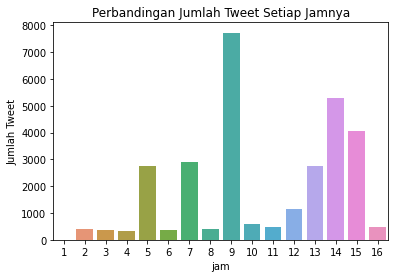

In [21]:
df1 =  df.groupby(['jam']).agg(len).reset_index()

p = sns.barplot(
    x = df1['jam'],
    y = df1['id']
)
plt.ylabel('Jumlah Tweet')
plt.title('Perbandingan Jumlah Tweet Setiap Jamnya')
plt.show()

paling sering ngetweet jam 5 pagi, sama 1 - 3 siang

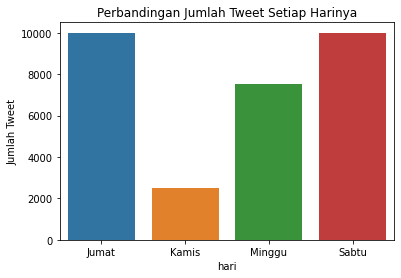

In [22]:
df1 =  df.groupby(['hari']).agg(len).reset_index()

p = sns.barplot(
    x = df1['hari'],
    y = df1['id']
)
plt.ylabel('Jumlah Tweet')
plt.title('Perbandingan Jumlah Tweet Setiap Harinya')
plt.show()

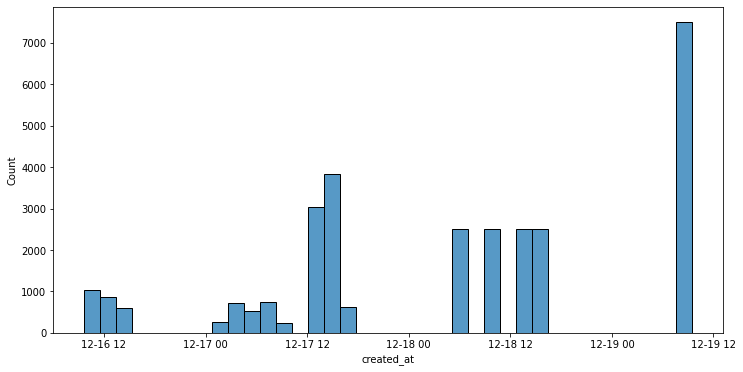

In [23]:
plt.figure(figsize = (12,6))
p = sns.histplot(
    x = df['created_at']
)

# Most Mentioned People

In [24]:
#Finding the @username
df['mentioned'] = [re.findall(r'(^|[^@\w])@(\w{1,15})\b',t) for t in df['tweet']]
mentionedlist = [re.findall(r'(^|[^@\w])@(\w{1,15})\b',t) for t in df['tweet']]
mentionedlist = [m for m in mentionedlist if len(m)!=0]

In [25]:
all_mentioned = []
for m in mentionedlist:
  for i in range(len(m)):
    all_mentioned.append(m[i][1])

In [26]:
len(all_mentioned)

29052

In [27]:
from collections import Counter
men = Counter(all_mentioned).most_common()[:20]
pd.DataFrame({
    'User': [m[0] for m in men],
    'Times Mentioned' : [m[1] for m in men]
})

,User,Times Mentioned
0,addien90s,3170
1,treasuremenfess,1021
2,aulianzl_,765
3,brgsjks,611
4,Marchfoward,397
5,f4izalhassan,392
6,tempodotco,368
7,AmirudinShari,360
8,redzuanNewsMPB,296
9,HermyRahim,280


# Kasus banjir yang didapatkan melalui tweet


## Banjir Rob Natuna

In [28]:
natuna = []
for t in df['tweet']:
  if 'natuna' in t.lower():
    # print(t)
    # print('==========================')
    natuna.append(t)
print(len(natuna))
print(len(list(set(natuna))))

10
3


## Banjir Jakarta

In [29]:
jakarta = []
for t in df['tweet']:
  if 'jakarta' in t.lower():
    # print(t)
    # print('==========================')
    jakarta.append(t)

In [30]:
print(f'Jumlah Tweet tentang Jakarta: {len(jakarta)}')
print(f'Jumlah Unique Tweet tentang Jakarta: {len(list(set(jakarta)))}')

Jumlah Tweet tentang Jakarta: 590
Jumlah Unique Tweet tentang Jakarta: 141


In [31]:
len(list(set(jakarta)))

141

### Isu Sumur Resapan

In [32]:
sumres = []
for t in df['tweet']:
  if 'resapan' in t.lower():
    # print(t)
    # print('==========================')
    sumres.append(t)

In [ ]:
len(sumres)

512

In [58]:
print(f"Jumlah tweet tentang banjir Sumur Resapan : {len(sumres)}")
print(f"Jumlah unique tweet tentang banjir Sumur Resapan : {len(list(set(sumres)))}")

Jumlah tweet tentang banjir Sumur Resapan : 512
Jumlah unique tweet tentang banjir Sumur Resapan : 117


## Banjir Garut

In [34]:
garut = []
for t in df['tweet']:
  if 'garut' in t.lower():
    garut.append(t)
len(garut)

15

In [35]:
print(f"Jumlah tweet tentang banjir Garut : {len(garut)}")
print(f"Jumlah unique tweet tentang banjir Garut : {len(list(set(garut)))}")

Jumlah tweet tentang banjir Garut : 15
Jumlah unique tweet tentang banjir Garut : 6


## Banjir Sumbar

In [36]:
sumbar = []
for t in df['tweet']:
  if 'sumbar' in t.lower():
    sumbar.append(t)
len(sumbar)

39

In [40]:
print(f"Jumlah tweet tentang banjir Sumbar : {len(sumbar)}")
print(f"Jumlah unique tweet tentang banjir Sumbar : {len(list(set(sumbar)))}")

Jumlah tweet tentang banjir Sumbar : 39
Jumlah unique tweet tentang banjir Sumbar : 14


## Banjir Malaysia

In [38]:
# Malaysia
malay = []
for t in df['tweet']:
  if ('malaysia' in t.lower()) or ('kuala' in t.lower()) or ('shah' in t.lower()):
    malay.append(t)

In [39]:
print(f"Jumlah tweet tentang banjir Malaysia : {len(malay)}")
print(f"Jumlah unique tweet tentang banjir Malaysia : {len(list(set(malay)))}")

Jumlah tweet tentang banjir Malaysia : 3343
Jumlah unique tweet tentang banjir Malaysia : 533


In [59]:
# Sulawesi
sul = []
for t in df['tweet']:
  if ('sulawesi' in t.lower()) or (('sulsel' in t.lower())) :
    sul.append(t)

In [60]:
print(f"Jumlah tweet tentang banjir Sulawesi Selatan : {len(sul)}")
print(f"Jumlah unique tweet tentang banjir Sulawesi Selatan : {len(list(set(sul)))}")

Jumlah tweet tentang banjir Sulawesi Selatan : 12
Jumlah unique tweet tentang banjir Sulawesi Selatan : 8


# Ngecheck Buzzer

In [ ]:
df

,id,tweet,created_at,user_created_at,screen_name,name,location,jam,hari
2499,1471413976361672708,RT @averyfirmansyah: Banjir hindari Jalan Raya...,2021-12-16 09:36:44+00:00,2009-06-28 16:08:58+00:00,Kounroan,@rendroko,,9,Kamis
2498,1471414041037864961,RT @aulianzl_: Banjir bgt liat ig story awkari...,2021-12-16 09:36:59+00:00,2019-07-14 17:37:00+00:00,Aku,@epooyy99,,9,Kamis
2497,1471414041809592323,RT @aulianzl_: Banjir bgt liat ig story awkari...,2021-12-16 09:36:59+00:00,2016-05-15 07:24:55+00:00,Faa 🍭,@Baekhyungluv,she/her 01',9,Kamis
2496,1471414069479366656,RT @averyfirmansyah: Banjir hindari Jalan Raya...,2021-12-16 09:37:06+00:00,2019-04-17 17:44:53+00:00,kuro,@heartsmith__,,9,Kamis
2495,1471414079113744391,"Iya banget pas di part itu auto banjir, apalgi...",2021-12-16 09:37:08+00:00,2018-12-11 23:27:38+00:00,Darkthen,@Jiijeell,,9,Kamis
...,...,...,...,...,...,...,...,...,...
20003,1472224152476082182,RT @hazemanhuzir: Kau faham tak perasaan orang...,2021-12-18 15:16:05+00:00,2015-02-02 07:03:11+00:00,ucop,@ucopahmad95,"Kuantan, Pahang",15,Sabtu
20002,1472224152719216642,RT @byzulfadhlizin: Antara barang cadangan Asa...,2021-12-18 15:16:05+00:00,2010-09-15 02:58:07+00:00,Ann Jaafar,@annjfr,,15,Sabtu
20001,1472224152736055303,"RT @aishzq: Sapa2 yg stuck area SEKSYEN 13, TT...",2021-12-18 15:16:05+00:00,2019-12-28 06:19:48+00:00,𝔓𝔦𝔫𝔞𝔞𝔞,@anifros_m,,15,Sabtu
20000,1472224152962490371,"RT @501Awani: Banjir Klang: Penduduk letih, ti...",2021-12-18 15:16:05+00:00,2018-08-12 11:24:41+00:00,Hokutou,@HarrazBasyir,"Malacca, Malaysia",15,Sabtu


In [ ]:
df['user_created_to_tweet_created'] = df['created_at'] - df['user_created_at']

In [ ]:
df.iloc[1935]['tweet']

'RT @Boediantar4: 2012 : dia target stadion persija jadi 2015\n2014 : dia ngomong macet dan banjir lebih mudah diatasi kalau jadi presiden\n20…'

In [ ]:
df.sort_values(by = 'user_created_to_tweet_created')[:30]

,id,tweet,created_at,user_created_at,screen_name,name,location,retweet_count,jam,hari,tweet_clean,mentioned,user_created_to_tweet_created
6277,1471834422542360579,@kerolhajiq Yup banjir naik paras lutut,2021-12-17 13:27:26+00:00,2021-12-17 13:22:26+00:00,Yaya,@Yaya09899933,,0,13,Jumat,yup banjir naik paras lutut,"[(, kerolhajiq)]",0 days 00:05:00
2935,1471750268534464520,*btw itu yang gua bilang gak bisa bawah keseko...,2021-12-17 07:53:02+00:00,2021-12-17 07:35:44+00:00,Guacapekmalesmagerdepresot,@GATAULAGICAPEKK,,0,7,Jumat,btw itu yang gua bilang gak bisa bawah kesekol...,[],0 days 00:17:18
2825,1471753879062679556,anjir banjir,2021-12-17 08:07:23+00:00,2021-12-17 07:38:15+00:00,gio,@sfrgiow,harshword,0,8,Jumat,anjir banjir,[],0 days 00:29:08
5437,1471841027560378370,Terkandas kereta bnyk rosak sbb banjir di klan...,2021-12-17 13:53:41+00:00,2021-12-17 13:22:26+00:00,Yaya,@Yaya09899933,,1,13,Jumat,terkandas kereta bnyk rosak sbb banjir di klang,[],0 days 00:31:15
9396,1471841027560378370,Terkandas kereta bnyk rosak sbb banjir di klan...,2021-12-17 13:53:41+00:00,2021-12-17 13:22:26+00:00,Yaya,@Yaya09899933,,2,13,Jumat,terkandas kereta bnyk rosak sbb banjir di klang,[],0 days 00:31:15
10711,1471869929984958466,"Bismillah, bulan desember banjir congrats",2021-12-17 15:48:31+00:00,2021-12-17 15:09:18+00:00,N7® | Follback ya,@Ndrawin7,United States,0,15,Jumat,bismillah bulan desember banjir congrats,[],0 days 00:39:13
6549,1471831006529220609,"Bismillah, bulan desember banjir congrats 🍀",2021-12-17 13:13:51+00:00,2021-12-17 12:12:14+00:00,spy™,@sikpentingyakin,,0,13,Jumat,bismillah bulan desember banjir congrats,[],0 days 01:01:37
2560,1471763798239240193,UNTUNG GK BANJIR,2021-12-17 08:46:48+00:00,2021-12-17 07:38:15+00:00,gio,@sfrgiow,harshword,0,8,Jumat,untung gk banjir,[],0 days 01:08:33
28780,1472499402556076035,RT @friedchikenbabe: MANA HELICOPTER MALAYSIA ...,2021-12-19 09:29:49+00:00,2021-12-19 07:59:45+00:00,nabila maisarah,@nabilamaisara17,,146,9,Minggu,mana helicopter malaysia ni sial hari...,"[( , friedchikenbabe)]",0 days 01:30:04
26280,1472499402556076035,RT @friedchikenbabe: MANA HELICOPTER MALAYSIA ...,2021-12-19 09:29:49+00:00,2021-12-19 07:59:45+00:00,nabila maisarah,@nabilamaisara17,,146,9,Minggu,mana helicopter malaysia ni sial hari...,"[( , friedchikenbabe)]",0 days 01:30:04


# Hashtag analysis

In [41]:
df['hashtag'] = [re.findall(r"#(\w+)",t) for t in [tl.lower() for tl in df['tweet']]]
ht = df['hashtag'].tolist()
ht = [h for h in ht if len(h)!=0]
ht_flat = [j for i in ht for j in i]

In [42]:
from collections import Counter

ht_flat = [h for h in ht_flat]
ht_top20 = Counter(ht_flat).most_common()[:20]
ht_top20

[('banjir', 455),
 ('daruratbanjir', 322),
 ('awaninews', 113),
 ('awani745', 89),
 ('shahalam', 68),
 ('pray4kualalangat', 57),
 ('tempovideo', 54),
 ('banj', 43),
 ('rtm', 34),
 ('beritartm', 29),
 ('bhnasional', 25),
 ('covid19malaysia', 24),
 ('mstar', 23),
 ('hululangat', 23),
 ('malaysiagazette', 22),
 ('rtm75', 20),
 ('terusunggul', 20),
 ('awanipagi', 20),
 ('banjirterengganu', 20),
 ('lind', 18)]

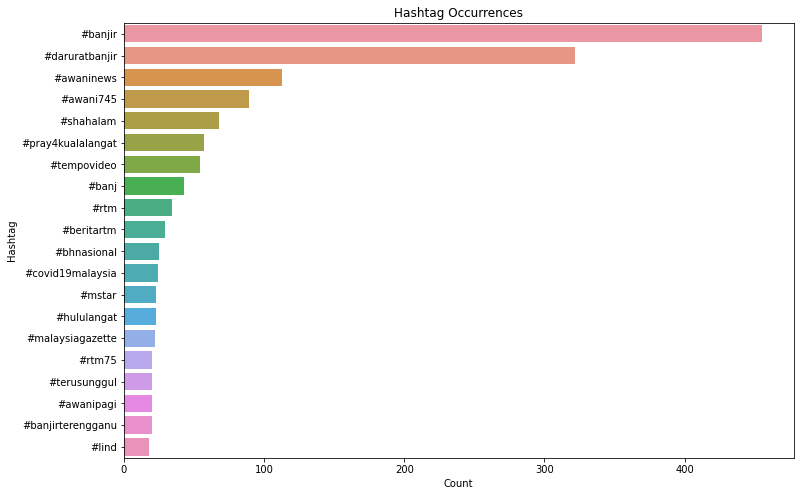

In [43]:
df_ht = pd.DataFrame({
    'Hashtag':[f"#{t[0]}" for t in ht_top20],
    'count':[t[1] for t in ht_top20]
})

plt.figure(figsize = (12,8))
p = sns.barplot(
    y = 'Hashtag',
    x = 'count',
    data = df_ht
)
plt.title('Hashtag Occurrences')
plt.xlabel('Count')
plt.show()

## Check #banjir

In [52]:
ht_banjir = []
for t in df['tweet']:
  if ('#banjir' in t.lower()):
    ht_banjir.append(t)

print(len(ht_banjir))
print(len(list(set(ht_banjir))))

525
318


In [49]:
print(f"Jumlah tweet Menggunakan #banjir : {len(ht_banjir)}")
print(f"Jumlah unique tweet Menggunakan #banjir : {len(list(set(ht_banjir)))}")

Jumlah tweet Menggunakan #banjir : 525
Jumlah unique tweet Menggunakan #banjir : 318


In [54]:
media = []
for hb in list(set(ht_banjir)):
  if 'https' in hb:
    media.append(hb)
print(f"Jumlah unique tweet Menggunakan #banjir dan mencantumkan media : {len(media)}")

Jumlah unique tweet Menggunakan #banjir dan mencantumkan media : 260


In [ ]:
list(set(ht_banjir))

['"Pada 1971 Kuala Lumpur\npernah ‘lumpuh\' akibat\nbencana alam ini yang telah\nmenyebabkan 180,000 mangsa\nterjejas dan 32 orang\nmeninggal dunia, seterusnya\nmengakibatkan perintah\ndarurat bencana diisytiharkan"\n\nPhot credit ~ C.Y.Leong\n\n#banjir #selangor #KL #Klang https://t.co/3PARii9eUD',
 'Ada hikmah disebalik hujan yg Allah dah trunkan so far, and what i see is harta dunia is nothing, smua barang yg kita ada skrang tak kekal, take notes dunia dah tua and bnykkan bertawakal kpd sang pencipta, \n\n#StaySafe \n#banjir',
 'RT @Thiban_ben: #BanjirSelangor #Klang #KualaLangat #Sepang \n\nHujan berterusan dijangka berlaku sehingga hari esok. Situasi banjir di Klang…',
 '#RNANEWS #Banjir \n\nHujan lebat berterusan menyebabkan beberapa kawasan sekitar Kuantan termasuk pekan Sungai Lembing di Pahang dinaiki air pagi ini.\n\n📸 Awam https://t.co/AQHLp9jnkW',
 'Terima kasih atas infonya Rekan Hasbi. Semoga banjir lekas surut dan tetap berhati-hati dalam perjalanan, semoga selamat sampa

# DataFrame to CSV

In [ ]:
df.to_csv('TweetBanjirFinal.csv',index = False)